In [51]:
#EJERCICIO 1
# Importar las librerías necesarias
from fiona import listlayers
import pandas as pd  # Importar Pandas para trabajar con archivos CSV

# Definir el enlace al archivo de los mapas del mundo
linkWorldMap = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

# Definir el enlace al archivo CSV de aeropuertos en Alemania
airportsFileLink = "https://github.com/TartariaData/GDF_Analytics/raw/main/data/de-airports.csv"

# Listar las capas en el archivo GPKG
layers = listlayers(linkWorldMap)
layers

# Leer el archivo CSV de aeropuertos en Alemania
airports = pd.read_csv(airportsFileLink)

In [52]:
# Importar geopandas
import geopandas as gpd

# Convertir el DataFrame de aeropuertos a GeoDataFrame
airports = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.longitude_deg, airports.latitude_deg), crs=4326)

# Leer los datos de las capas específicas
countries = gpd.read_file(linkWorldMap, layer='countries')
rivers = gpd.read_file(linkWorldMap, layer='rivers')
cities = gpd.read_file(linkWorldMap, layer='cities')
indicators = gpd.read_file(linkWorldMap, layer='indicators')

# Filtrar los datos para Alemania
germany = countries[countries.COUNTRY == 'Germany']

# Mostrar información sobre Alemania
germany.head()


,COUNTRY,geometry
87,Germany,"MULTIPOLYGON (((7.36901 49.16878, 7.36403 49.1..."


In [53]:
import pandas as pd

# Leer datos de puertos
portsFileLink = "https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports = pd.read_csv(portsFileLink)

# Mostrar nombres de columnas disponibles
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [54]:
# Renombrar columna
infoseaports.rename(columns={'Main Port Name':'portName'}, inplace=True)

# Mantener solo algunas columnas
infoseaports = infoseaports.loc[:, ['portName', 'Country Code', 'Latitude', 'Longitude']]

# Mostrar información del DataFrame
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [55]:
# Mostrar algunas filas
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [56]:
# Mostrar los códigos de país únicos en infoseaports
infoseaports['Country Code'].unique()

array(['United States', 'Indonesia', 'Madagascar', 'Tanzania', 'Vanuatu',
       'Papua New Guinea', 'Palau', 'Federated States of Micronesia',
       'Turkey', 'Canada', 'Gibraltar', 'Norway', 'Brazil',
       'Saudi Arabia', 'Latvia', 'Denmark', 'Ukraine', 'Iran',
       'Saint Helena, Ascension, and Tristan da Cunha', 'Thailand',
       'Greece', 'United Kingdom', 'Spain', 'Italy', 'Burma',
       'Norfolk Island', 'Malaysia', 'Sudan', 'Philippines', 'Russia',
       'Algeria', 'Senegal', 'Equatorial Guinea', 'Chile', 'India',
       'Antarctica', 'Greenland', 'Nigeria', 'Gabon', 'Australia',
       'New Zealand', 'Kiribati', 'Sweden', 'China', 'South Korea',
       'Japan', 'France', 'Cuba', 'Sint Maarten', 'Egypt',
       'French Polynesia', 'Taiwan', 'Yemen', 'United Arab Emirates',
       'Dominican Republic', 'Cambodia', 'Wake Island', 'Reunion',
       'Poland', 'Honduras', 'Angola',
       'South Georgia and South Sandwich Islands', 'Guinea',
       'Guinea-Bissau', 'Ireland'

In [57]:
# Crear un GeoDataFrame a partir de los puntos (sin proyectar)
seaports = gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)  # Observa que no está proyectado

# Mantener solo los puertos de Alemania
seaports_ger = seaports[seaports['Country Code'] == 'Germany'].copy()

# Reiniciar los índices
seaports_ger.reset_index(drop=True, inplace=True)

# Reproyectar
seaports_ger_25832 = seaports_ger.to_crs(25832)  # CRS proyectado para Alemania

# Mostrar las primeras filas del GeoDataFrame de los puertos en Alemania proyectado
seaports_ger_25832.head()


,portName,Country Code,Latitude,Longitude,geometry
0,Kiel,Germany,54.316667,10.133333,POINT (573722.969 6019347.392)
1,Butzfleth,Germany,53.650000,9.516667,POINT (534150.597 5944705.652)
2,Emden,Germany,53.333333,7.183333,POINT (379029.642 5910890.648)
3,Bremen,Germany,53.133333,8.766667,POINT (484389.231 5887128.322)
4,Nordenham,Germany,53.483333,8.483333,POINT (465714.877 5926163.772)


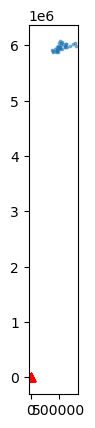

In [58]:
# Crear un subconjunto de aeropuertos grandes en Alemania
largeAirports = airports[airports['type'] == 'large_airport'].copy()  # No se puede usar "airports.kind"
largeAirports.reset_index(drop=True, inplace=True)

# Importar matplotlib.pyplot para visualización
import matplotlib.pyplot as plt

# Ploteando los puertos y los aeropuertos grandes en Alemania
base = largeAirports.plot(color='red', marker='^')
seaports_ger_25832.plot(ax=base, alpha=0.5, markersize=3)
plt.show()


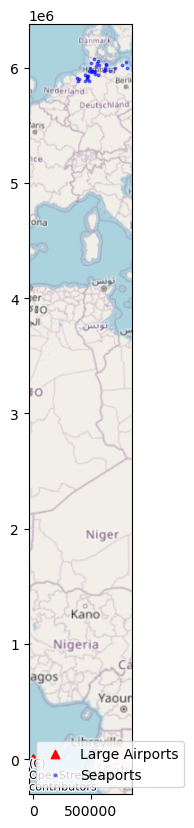

In [59]:
# Instalar contextily
!pip install contextily

import contextily as ctx

# Ploteando los puertos y los aeropuertos grandes en Alemania
fig, ax = plt.subplots(figsize=(10, 10))
base = largeAirports.plot(ax=ax, color='red', marker="^", label='Large Airports')
seaports_ger_25832.plot(ax=base, alpha=0.5, markersize=3, color='blue', label='Seaports')

# Añadir un mapa base
ctx.add_basemap(ax, crs=seaports_ger_25832.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir leyenda
plt.legend()
plt.show()

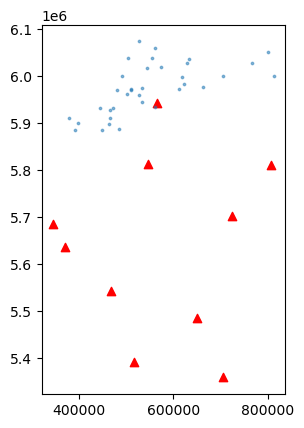

In [60]:
# Crear un GeoDataFrame a partir de los puntos (sin proyectar)
seaports = gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)  # Observa que no está proyectado

# Mantener solo los puertos de Alemania
seaports_ger = seaports[seaports['Country Code'] == 'Germany'].copy()

# Reiniciar los índices
seaports_ger.reset_index(drop=True, inplace=True)

# Reproyectar
seaports_ger_25832 = seaports_ger.to_crs(25832)  # CRS proyectado para Alemania

# Asegurarse de que los aeropuertos están en el mismo CRS
airports_gdf = gpd.GeoDataFrame(airports,
                                geometry=gpd.points_from_xy(airports.longitude_deg, airports.latitude_deg),
                                crs=4326)

# Reproyectar aeropuertos al CRS de Alemania
airports_gdf_25832 = airports_gdf.to_crs(25832)

# Crear un subconjunto de aeropuertos grandes en Alemania
largeAirports = airports_gdf_25832[airports_gdf_25832['type'] == 'large_airport'].copy()
largeAirports.reset_index(drop=True, inplace=True)

# Ploteando los puertos y los aeropuertos grandes en Alemania
base = largeAirports.plot(color='red', marker="^")
seaports_ger_25832.plot(ax=base, alpha=0.5, markersize=3)
plt.show()

In [61]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Crear un mapa base centrado en Alemania
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Añadir aeropuertos grandes
for idx, row in largeAirports.iterrows():
    folium.Marker(location=[row['latitude_deg'], row['longitude_deg']], popup=row['name'], icon=folium.Icon(color='red', icon='plane')).add_to(m)

# Añadir puertos
for idx, row in seaports_ger_25832.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['portName'], icon=folium.Icon(color='blue', icon='anchor')).add_to(m)

# Mostrar el mapa
m.save('map.html')
m

In [62]:
# Mostrar las primeras filas del GeoDataFrame de los puertos en Alemania proyectado
seaports_ger_25832.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Kiel,Germany,54.316667,10.133333,POINT (573722.969 6019347.392)
1,Butzfleth,Germany,53.650000,9.516667,POINT (534150.597 5944705.652)
2,Emden,Germany,53.333333,7.183333,POINT (379029.642 5910890.648)
3,Bremen,Germany,53.133333,8.766667,POINT (484389.231 5887128.322)
4,Nordenham,Germany,53.483333,8.483333,POINT (465714.877 5926163.772)


In [63]:
# Mostrar las primeras filas del DataFrame de los grandes aeropuertos en Alemania
largeAirports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated,geometry
0,2212,EDDF,large_airport,Frankfurt Airport,50.030241,8.561096,364.0,EU,Germany,DE,...,1,EDDF,FRA,NaN,https://www.frankfurt-airport.de/,https://en.wikipedia.org/wiki/Frankfurt_Airport,"EDAF, Frankfurt am Main, Frankfurt Main, Rhein...",1144675,2024-04-02T16:06:40+00:00,POINT (468564.822 5542085.319)
1,2218,EDDM,large_airport,Munich Airport,48.353802,11.786100,1487.0,EU,Germany,DE,...,1,EDDM,MUC,NaN,http://www.munich-airport.com/,https://en.wikipedia.org/wiki/Munich_Airport,"Franz Josef Strauss Airport, Flughafen München...",1026675,2022-03-29T22:05:19+00:00,POINT (706396.099 5359376.354)
2,2217,EDDL,large_airport,Düsseldorf Airport,51.289501,6.766780,147.0,EU,Germany,DE,...,1,EDDL,DUS,NaN,http://www.dus.com/dus_en/,https://en.wikipedia.org/wiki/D%C3%BCsseldorf_...,NaN,1017675,2023-12-04T14:06:43+00:00,POINT (344281.592 5684387.872)
3,2214,EDDH,large_airport,Hamburg Helmut Schmidt Airport,53.630402,9.988230,53.0,EU,Germany,DE,...,1,EDDH,HAM,NaN,https://www.hamburg-airport.de/en/,https://en.wikipedia.org/wiki/Hamburg_Airport,Hamburg-Fuhlsbüttel Airport,1012575,2021-03-12T16:04:07+00:00,POINT (565349.504 5942855.095)
4,2216,EDDK,large_airport,Cologne Bonn Airport,50.865898,7.142740,302.0,EU,Germany,DE,...,1,EDDK,CGN,NaN,http://www.koeln-bonn-airport.de/en/,https://en.wikipedia.org/wiki/Cologne_Bonn_Air...,Köln,51475,2023-12-04T20:06:04+00:00,POINT (369306.134 5636555.728)


In [64]:
# Distancia entre el primer aeropuerto grande y el primer puerto en Alemania
distance_km = largeAirports.iloc[0].geometry.distance(seaports_ger_25832.iloc[0].geometry) / 1000  # en km
distance_km

488.7098548169685

In [65]:
# Opción 3: reordenar la salida previa
distances_reordered = seaports_ger_25832.set_index('portName').geometry.apply(
    lambda g: largeAirports.set_index('name').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)
distances_reordered.head()

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
portName,,,,,,,,,,
Brake,354.778592,289.408259,255.698314,367.403245,105.191619,126.288439,332.251958,600.496340,463.014246,518.955116
Bremen,330.911344,275.736729,246.442367,345.405683,98.285498,97.087601,303.659694,572.546233,435.099551,495.151915
Bremerhaven,355.188793,312.609820,278.504627,389.616247,93.635224,140.334364,341.534133,618.301524,480.899723,540.464947
Brunsbuttel Canal Terminals,337.681912,364.073827,332.218896,432.297306,62.871259,164.016574,345.740454,643.765117,507.310293,579.434335
Brunsbuttel Elbahafen,335.832292,362.794067,331.166675,430.560771,61.040591,161.966988,343.606464,641.666145,505.226500,577.571266


In [66]:
# Crear la matriz de distancias entre puertos y aeropuertos grandes (mantener nombres de índices)
distanceMatrixKM_sea_air = seaports_ger_25832.set_index('portName').geometry.apply(
    lambda g: largeAirports.set_index('name').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)

# La distancia media desde un puerto a todos los aeropuertos grandes (ordenada)
mean_distances = distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)
mean_distances.head()

portName
Bremen       320.032662
Oldenburg    331.704344
Elsfleth     334.086680
Hamburg      337.005726
Brake        341.348613
dtype: float64

In [67]:
# Calcular más estadísticas
SomeStats = pd.DataFrame()
SomeStats['mean'] = distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min'] = distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max'] = distanceMatrixKM_sea_air.max(axis=1)

# Ver algunas estadísticas
SomeStats.head(10)

,mean,min,max
portName,,,
Brake,341.348613,105.191619,600.496340
Bremen,320.032662,97.087601,572.546233
Bremerhaven,355.108940,93.635224,618.301524
Brunsbuttel Canal Terminals,376.940997,62.871259,643.765117
Brunsbuttel Elbahafen,375.143176,61.040591,641.666145
Busum,403.365856,92.554962,674.223724
Butzfleth,349.225603,31.253741,610.146622
Cuxhaven,381.169587,87.875182,649.570969
Eckernforde,429.394014,95.442681,695.155599


In [68]:
# Aeropuerto más lejano a cada puerto
farthest_airports = distanceMatrixKM_sea_air.idxmax(axis=1)

# Mostrar resultados
farthest_airports

portName
Brake                             Munich Airport
Bremen                            Munich Airport
Bremerhaven                       Munich Airport
Brunsbuttel Canal Terminals       Munich Airport
Brunsbuttel Elbahafen             Munich Airport
Busum                             Munich Airport
Butzfleth                         Munich Airport
Cuxhaven                          Munich Airport
Eckernforde                       Munich Airport
Elsfleth                          Munich Airport
Emden                             Munich Airport
Flensburg                         Munich Airport
Gluckstadt                        Munich Airport
Hamburg                           Munich Airport
Heiligenhafen                     Munich Airport
Husum                             Munich Airport
Itzehoe                           Munich Airport
Kappeln                           Munich Airport
Kiel                              Munich Airport
Leer                              Munich Airport
Lubeck     

In [69]:
# Puerto más lejano a cada aeropuerto
farthest_seaports = distanceMatrixKM_sea_air.idxmax(axis=0)

# Mostrar resultados
farthest_seaports


name
Berlin Brandenburg Airport            Emden
Cologne Bonn Airport               Sassnitz
Düsseldorf Airport                 Sassnitz
Frankfurt Airport                  Sassnitz
Hamburg Helmut Schmidt Airport     Sassnitz
Hannover Airport                   Sassnitz
Leipzig/Halle Airport             Flensburg
Munich Airport                    Flensburg
Nuremberg Airport                 Flensburg
Stuttgart Airport                  Sassnitz
dtype: object

In [70]:
# Aeropuerto más cercano a cada puerto
closest_airports = distanceMatrixKM_sea_air.idxmin(axis=1)

# Mostrar resultados
closest_airports

portName
Brake                          Hamburg Helmut Schmidt Airport
Bremen                                       Hannover Airport
Bremerhaven                    Hamburg Helmut Schmidt Airport
Brunsbuttel Canal Terminals    Hamburg Helmut Schmidt Airport
Brunsbuttel Elbahafen          Hamburg Helmut Schmidt Airport
Busum                          Hamburg Helmut Schmidt Airport
Butzfleth                      Hamburg Helmut Schmidt Airport
Cuxhaven                       Hamburg Helmut Schmidt Airport
Eckernforde                    Hamburg Helmut Schmidt Airport
Elsfleth                       Hamburg Helmut Schmidt Airport
Emden                          Hamburg Helmut Schmidt Airport
Flensburg                      Hamburg Helmut Schmidt Airport
Gluckstadt                     Hamburg Helmut Schmidt Airport
Hamburg                        Hamburg Helmut Schmidt Airport
Heiligenhafen                  Hamburg Helmut Schmidt Airport
Husum                          Hamburg Helmut Schmidt Airport

In [71]:
# Puerto más cercano a cada aeropuerto
closest_seaports = distanceMatrixKM_sea_air.idxmin(axis=0)

# Mostrar resultados
closest_seaports

name
Berlin Brandenburg Airport          Wolgast
Cologne Bonn Airport              Papenburg
Düsseldorf Airport                Papenburg
Frankfurt Airport                 Oldenburg
Hamburg Helmut Schmidt Airport      Hamburg
Hannover Airport                     Bremen
Leipzig/Halle Airport                Wismar
Munich Airport                       Bremen
Nuremberg Airport                    Bremen
Stuttgart Airport                    Bremen
dtype: object

In [72]:
#Ejericio 2
# Visualizar las primeras filas del DataFrame de ríos
rivers.head()


,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


In [73]:
# Filtrar un río en Alemania (por ejemplo, el río 'Rhine')
rhine_river = rivers[rivers.NAME.str.contains('Rhine', case=False, na=False)]
rhine_river.head()

,NAME,SYSTEM,geometry
61,Rhine,None,"MULTILINESTRING ((6.25146 51.93364, 6.11321 52..."


In [74]:
# Calcular la distancia desde cada aeropuerto al río 'Rhine'
distances_to_rhine = rhine_river.iloc[0].geometry.distance(largeAirports.set_index('name').geometry) / 1000  # en km

# Mostrar las distancias
distances_to_rhine

name
Frankfurt Airport                 5561.805472
Munich Airport                    5405.677007
Düsseldorf Airport                5694.751921
Hamburg Helmut Schmidt Airport    5969.633262
Cologne Bonn Airport              5648.588879
Stuttgart Airport                 5417.616635
Nuremberg Airport                 5523.353923
Hannover Airport                  5838.132539
Berlin Brandenburg Airport        5866.501357
Leipzig/Halle Airport             5747.390731
Name: geometry, dtype: float64

In [75]:
# Calcular la matriz de distancias entre ríos y aeropuertos en Alemania
distanceMatrixKM_riv_air = rivers.set_index('NAME').geometry.apply(
    lambda g: largeAirports.set_index('name').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)

# Mostrar la matriz de distancias
distanceMatrixKM_riv_air

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
NAME,,,,,,,,,,
Aldan,5866.472563,5648.569178,5694.732844,5561.783386,5969.609855,5838.109269,5747.363366,5405.649066,5523.327607,5417.593152
Amazon,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Amu Darya,5866.502129,5648.593553,5694.756861,5561.809130,5969.636354,5838.135690,5747.392120,5405.678148,5523.355765,5417.619695
Amur,5866.481693,5648.578888,5694.742590,5561.792955,5969.619344,5838.118766,5747.372599,5405.658258,5523.336916,5417.602636
Angara,5866.481318,5648.575737,5694.739245,5561.790532,5969.617318,5838.116699,5747.371778,5405.657616,5523.335768,5417.600634
...,...,...,...,...,...,...,...,...,...,...
Xingu,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Yangtze,5866.504867,5648.600267,5694.763751,5561.815164,5969.641775,5838.141179,5747.395573,5405.681313,5523.359741,5417.625078
Yenisey,5866.472708,5648.565597,5694.729010,5561.780778,5969.607787,5838.107145,5747.362924,5405.648862,5523.326733,5417.591115


In [76]:
# Visualizar una fila específica de la matriz de distancias, en este caso, el río 'Rhine'
distanceMatrixKM_riv_air.loc['Rhine'].sort_values()

name
Munich Airport                    5405.677007
Stuttgart Airport                 5417.616635
Nuremberg Airport                 5523.353923
Frankfurt Airport                 5561.805472
Cologne Bonn Airport              5648.588879
Düsseldorf Airport                5694.751921
Leipzig/Halle Airport             5747.390731
Hannover Airport                  5838.132539
Berlin Brandenburg Airport        5866.501357
Hamburg Helmut Schmidt Airport    5969.633262
Name: Rhine, dtype: float64

In [77]:
# Instalar mapclassify
!pip install mapclassify

# Crear el mapa base con los aeropuertos grandes
base = largeAirports.explore(color='red', marker_kwds=dict(radius=10))

# Agregar el río Rhine al mapa
rivers[rivers.NAME.str.contains('Rhine')].explore(m=base)

In [78]:
# Filtrar los ríos que pertenecen a Alemania
riversGermany_clipped= gpd.clip(gdf=rivers,
                               mask=germany)  #Los ríos de Alemania en la data no presentan "SYSTEM" (sale como "None"), por tal motivo se realizó el clipeo.
# Mostrar los ríos filtrados
riversGermany_clipped

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [79]:
# Renombramos para no perder la ilación
rivers_with_system = riversGermany_clipped

In [80]:
rivers_with_system

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [81]:
#renombramos
systems=rivers_with_system
systems

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [82]:
# Formatear el GeoDataFrame de los sistemas de ríos
systems.reset_index(drop=False, inplace=True)
systems.drop(columns='NAME', inplace=True)

# Mostrar el resultado formateado
systems

,index,SYSTEM,geometry
0,14,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
1,61,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [83]:
#Eliminamos columna index
systems.drop(columns=['index', 'NAME'], inplace=True, errors='ignore')
systems

,SYSTEM,geometry
0,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
1,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [84]:
# Calcular la matriz de distancias entre los sistemas de ríos y los aeropuertos grandes
distanceMatrixKM_sys_air = systems.set_index('SYSTEM').geometry.apply(
    lambda g: largeAirports.set_index('name').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)

# Mostrar la matriz de distancias
distanceMatrixKM_sys_air

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
SYSTEM,,,,,,,,,,
None,5866.503444,5648.591429,5694.754503,5561.807903,5969.635626,5838.134910,5747.392892,5405.679138,5523.356138,5417.618995
None,5866.501502,5648.589047,5694.752091,5561.805635,5969.633421,5838.132698,5747.390879,5405.677154,5523.354074,5417.616794


In [85]:
# Obtener las distancias mínimas
mins = distanceMatrixKM_sys_air.idxmin(axis="columns")  # lo mismo que axis=1
mins


SYSTEM
None    Munich Airport
None    Munich Airport
dtype: object

In [86]:
# Obtener uno de los valores mínimos
mins.iloc[1]

'Munich Airport'

In [87]:
# Crear el mapa base con los sistemas de ríos
base = systems.explore()

# Aeropuertos más cercanos
largeAirports[largeAirports.name.isin(mins)].explore(
    m=base,
    color='red',
    marker_kwds=dict(radius=10),
    legend=True,
    name='Closest Airports'
)

# Aeropuertos no cercanos
largeAirports[~largeAirports.name.isin(mins)].explore(
    m=base,
    color='blue',
    marker_kwds=dict(radius=5),
    legend=True,
    name='Not Closest Airports'
)

In [88]:
#Ejercicio 3

# Creación de envolventes convexas (HULLs) para un conjunto de mapas de líneas.

# Creamos algunos cascos convexos para nuestro sistema alemán de ríos:
# Polígono para cada sistema
systems.convex_hull

0    POLYGON ((8.73734 47.99981, 8.38960 48.14701, ...
1    POLYGON ((9.72328 47.53838, 7.83207 47.58050, ...
dtype: geometry

<Axes: >

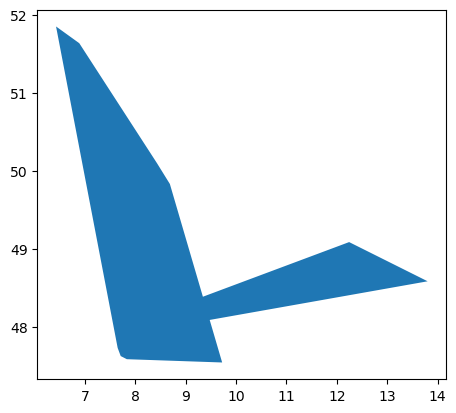

In [89]:
# Visualización de los polígonos
systems.convex_hull.plot()

In [90]:
# Ahora, un GeoDataFrame para los hulls
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['None', 'None']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:4326" #Empleamos este valor de EPSG ya que es el que mejor se ajusta.
systems_hulls

,geometry,system
0,"POLYGON ((8.73734 47.99981, 8.38960 48.14701, ...",None
1,"POLYGON ((9.72328 47.53838, 7.83207 47.58050, ...",None


In [91]:
# Definimos la matriz de distancias
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
system,,,,,,,,,,
None,5866.503444,5648.591429,5694.754503,5561.807903,5969.635626,5838.134910,5747.392892,5405.679138,5523.356138,5417.618995
None,5866.501502,5648.589047,5694.752091,5561.805635,5969.633421,5838.132698,5747.390879,5405.677154,5523.354074,5417.616794


In [92]:
# Definimos la matriz de distancias
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
system,,,,,,,,,,
None,5866.503444,5648.591429,5694.754503,5561.807903,5969.635626,5838.134910,5747.392892,5405.679138,5523.356138,5417.618995
None,5866.501502,5648.589047,5694.752091,5561.805635,5969.633421,5838.132698,5747.390879,5405.677154,5523.354074,5417.616794


In [93]:
# Graficamos los cascos y los puntos. Además, se muestran los puntos más cercanos y más lejanos al casco.
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [94]:
# Ejercicio 4

# Recordamos
distanceMatrixKM_riv_air #DF con distancias en kilómetros entre diferentes sistemas de ríos y aeropuertos de Alemania.

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
NAME,,,,,,,,,,
Aldan,5866.472563,5648.569178,5694.732844,5561.783386,5969.609855,5838.109269,5747.363366,5405.649066,5523.327607,5417.593152
Amazon,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Amu Darya,5866.502129,5648.593553,5694.756861,5561.809130,5969.636354,5838.135690,5747.392120,5405.678148,5523.355765,5417.619695
Amur,5866.481693,5648.578888,5694.742590,5561.792955,5969.619344,5838.118766,5747.372599,5405.658258,5523.336916,5417.602636
Angara,5866.481318,5648.575737,5694.739245,5561.790532,5969.617318,5838.116699,5747.371778,5405.657616,5523.335768,5417.600634
...,...,...,...,...,...,...,...,...,...,...
Xingu,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Yangtze,5866.504867,5648.600267,5694.763751,5561.815164,5969.641775,5838.141179,5747.395573,5405.681313,5523.359741,5417.625078
Yenisey,5866.472708,5648.565597,5694.729010,5561.780778,5969.607787,5838.107145,5747.362924,5405.648862,5523.326733,5417.591115


In [95]:
# Elegimos un valor cualquiera, en este caso min

distanceMatrixKM_riv_air.loc['Amazon'].min() # Encuentra la distancia más corta (mínima) entre el sistema de ríos "Amazon" y
#cualquiera de los aeropuertos listados en las columnas del DF

5405.737675775065

In [96]:
distanceMatrixKM_riv_air

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
NAME,,,,,,,,,,
Aldan,5866.472563,5648.569178,5694.732844,5561.783386,5969.609855,5838.109269,5747.363366,5405.649066,5523.327607,5417.593152
Amazon,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Amu Darya,5866.502129,5648.593553,5694.756861,5561.809130,5969.636354,5838.135690,5747.392120,5405.678148,5523.355765,5417.619695
Amur,5866.481693,5648.578888,5694.742590,5561.792955,5969.619344,5838.118766,5747.372599,5405.658258,5523.336916,5417.602636
Angara,5866.481318,5648.575737,5694.739245,5561.790532,5969.617318,5838.116699,5747.371778,5405.657616,5523.335768,5417.600634
...,...,...,...,...,...,...,...,...,...,...
Xingu,5866.562370,5648.646101,5694.808875,5561.863715,5969.692061,5838.191280,5747.451166,5405.737676,5523.413929,5417.675466
Yangtze,5866.504867,5648.600267,5694.763751,5561.815164,5969.641775,5838.141179,5747.395573,5405.681313,5523.359741,5417.625078
Yenisey,5866.472708,5648.565597,5694.729010,5561.780778,5969.607787,5838.107145,5747.362924,5405.648862,5523.326733,5417.591115


In [97]:
# Solo quiero los ríos de Alemania

specific_rivers = ['Danube', 'Rhine']

# Filtrar el DF para incluir solo los ríos especificados
distanceMatrixKM_riv_air = distanceMatrixKM_riv_air.loc[specific_rivers]
distanceMatrixKM_riv_air # Mostramos

name,Berlin Brandenburg Airport,Cologne Bonn Airport,Düsseldorf Airport,Frankfurt Airport,Hamburg Helmut Schmidt Airport,Hannover Airport,Leipzig/Halle Airport,Munich Airport,Nuremberg Airport,Stuttgart Airport
NAME,,,,,,,,,,
Danube,5866.503444,5648.591429,5694.754503,5561.807903,5969.635626,5838.134910,5747.392892,5405.679138,5523.356138,5417.618995
Rhine,5866.501357,5648.588879,5694.751921,5561.805472,5969.633262,5838.132539,5747.390731,5405.677007,5523.353923,5417.616635


In [98]:
# Elegimos un valor cualquiera, en este caso min

distanceMatrixKM_riv_air.loc['Rhine'].min() # Encuentra la distancia más corta (mínima) entre el río "Rhine"
# y cualquiera de los aeropuertos listados en las columnas del DF

5405.67700688333

In [99]:
# Usamos un valor random para crear el buffer:
minMts=distanceMatrixKM_riv_air.loc['Rhine'].min()*1 # km
# El buffer es un polígono, entonces
rivers[rivers.NAME=='Rhine'].buffer(distance = minMts)

C:\Users\frede\AppData\Local\Temp\ipykernel_25800\3227383231.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rivers[rivers.NAME=='Rhine'].buffer(distance = minMts)


61    POLYGON ((-5398.13956 16.90368, -5401.50576 10...
dtype: geometry

In [100]:
rivers = rivers.to_crs(epsg=3395)

# Crear un buffer alrededor del río Rin en el sistema de coordenadas proyectadas
bufferAroundRhine = rivers[rivers.NAME=='Rhine'].buffer(distance=minMts)

# Crear un mapa base con el buffer coloreado en rojo
bufferAsBase = bufferAroundRhine.explore(color='red')

# Visualizar el río Rin y su buffer en el mapa base, coloreando el río en azul
rivers[rivers.NAME=='Rhine'].explore(m=bufferAsBase, color='blue', style_kwds={'weight': 2})